In [214]:
data<-read.csv(file="titanic.csv",header=TRUE,sep=",")
print(colnames(data))

 [1] "pclass"    "survived"  "name"      "sex"       "age"       "sibsp"    
 [7] "parch"     "ticket"    "fare"      "cabin"     "embarked"  "boat"     
[13] "body"      "home.dest"


In [215]:
data <- data.frame(data$pclass,data$survived,data$sex,data$age)     #selecting required columns 
colnames(data)<-c('class','survived','sex','age')
x <- data[complete.cases(data), ]                  #check for rows with missing values
data <- na.omit(x)                                 #remove rows with missing values
data$age<-ifelse(data$age>=18.0,"Adult","Child")   #converting data into categorical data
print(data)

     class survived    sex   age
1        1        1 female Adult
2        1        1   male Child
3        1        0 female Child
4        1        0   male Adult
5        1        0 female Adult
6        1        1   male Adult
7        1        1 female Adult
8        1        0   male Adult
9        1        1 female Adult
10       1        0   male Adult
11       1        0   male Adult
12       1        1 female Adult
13       1        1 female Adult
14       1        1 female Adult
15       1        1   male Adult
17       1        0   male Adult
18       1        1 female Adult
19       1        1 female Adult
20       1        0   male Adult
21       1        1   male Adult
22       1        1 female Adult
23       1        1   male Adult
24       1        1 female Adult
25       1        1 female Adult
26       1        0   male Adult
27       1        1   male Adult
28       1        1 female Adult
29       1        1 female Adult
30       1        1   male Adult
31       1

In [216]:
bound <- floor((nrow(data)/4)*3)         #training data: 75% and test data: 25%
data <- data[sample(nrow(data)), ]           #sample rows 
data.train <- data[1:bound, ]              #get training set
data.test <- data[(bound+1):nrow(data), ]    #get test set

In [217]:
naiveBayes<-function(dataFrame){
     
    
    #probabilty that a person survives p(survived=Y)
    probSurvivedY<-nrow(dataFrame[ which(dataFrame$survived==1),])/nrow(dataFrame)
    #probability that a person do not survive p(survived=N)
    probSurvivedN<-nrow(dataFrame[which(dataFrame$survived==0),])/nrow(dataFrame)
    
    rownames<-c('survivedY','survivedN')
    colnames<-c('class1','class2','class3','ageChild','ageAdult','sexM','sexF')
    #probabilities matrix will hold the conditional probabilities of the survival with respect to features
    #e.g., probabilities['survivedY','class1'] gives the probability that a person beolongs to class1 
    #given that he survived : p(class=1/surivived=Y)
    probabilities<-matrix(data=0.0,nrow=2,ncol=7,byrow=TRUE,dimnames=list(rownames,colnames))
    
    numberSurvived<-nrow(dataFrame[which(dataFrame$survived==1),])
    numberDied<-nrow(dataFrame[which(dataFrame$survived==0),])
    probabilities['survivedY','class1']=nrow(dataFrame[which(dataFrame$survived==1 & dataFrame$class==1),])/numberSurvived    
    probabilities['survivedY','class2']=nrow(dataFrame[which(dataFrame$survived==1 & dataFrame$class==2),])/numberSurvived
    probabilities['survivedY','class3']=nrow(dataFrame[which(dataFrame$survived==1 & dataFrame$class==3),])/numberSurvived
    probabilities['survivedN','class1']=nrow(dataFrame[which(dataFrame$survived==0 & dataFrame$class==1),])/numberDied
    probabilities['survivedN','class2']=nrow(dataFrame[which(dataFrame$survived==0 & dataFrame$class==2),])/numberDied
    probabilities['survivedN','class3']=nrow(dataFrame[which(dataFrame$survived==0 & dataFrame$class==3),])/numberDied
    
    probabilities['survivedY','ageChild']=nrow(dataFrame[which(dataFrame$survived==1 & dataFrame$age=='Child'),])/numberSurvived
    probabilities['survivedY','ageAdult']=nrow(dataFrame[which(dataFrame$survived==1 & dataFrame$age=='Adult'),])/numberSurvived
    probabilities['survivedN','ageChild']=nrow(dataFrame[which(dataFrame$survived==0 & dataFrame$age=='Child'),])/numberDied
    probabilities['survivedN','ageAdult']=nrow(dataFrame[which(dataFrame$survived==0 & dataFrame$age=='Adult'),])/numberDied
    
    probabilities['survivedY','sexM']=nrow(dataFrame[which(dataFrame$survived==1 & dataFrame$sex=='male'),])/numberSurvived
    probabilities['survivedY','sexF']=nrow(dataFrame[which(dataFrame$survived==1 & dataFrame$sex=='female'),])/numberSurvived
    probabilities['survivedN','sexM']=nrow(dataFrame[which(dataFrame$survived==0 & dataFrame$sex=='male'),])/numberDied
    probabilities['survivedN','sexF']=nrow(dataFrame[which(dataFrame$survived==0 & dataFrame$sex=='female'),])/numberDied
    result=list(probSurvivedY,probSurvivedN,b=probabilities)
    return (result)
}


In [218]:
predict<-function(class,age,sex){
    classStr<-''
    ageStr<-''
    sexStr<-''
    if(class==1){
        classStr<-'class1'
    }
    else if(class==2){
        classStr<-'class2'
    }
    else{
        classStr<-'class3'
    }
    if(age=='Adult'){
        ageStr<-'ageAdult'
    }
    else{
        ageStr<-'ageChild'
    }
    if(sex=='male'){
        sexStr<-'sexM'
    }
    else{
        sexStr<-'sexF'
    }
    #probY is the probability that the person survives given the features p(survived=Y/age,class,sex)
    #probN is the probability that the person do not survive give features p(survived=N/age,class,sex)
    probY=probSurvivedY*probabilities['survivedY',classStr]*probabilities['survivedY',ageStr]*probabilities['survivedY',sexStr]
    probN=probSurvivedN*probabilities['survivedN',classStr]*probabilities['survivedN',ageStr]*probabilities['survivedN',sexStr]
    survived<-0
    if(probY>=probN){
        survived<-1
    }
    return (survived)
}

In [219]:
result<-naiveBayes(data.train)
probSurvivedY<-as.double(result[1])              #probability that a person didn't survive
probSurvivedN<-as.double(result[2])              #probability that a person survived
probabilities<-result[['b']]
print(probabilities)                             #required probabilities

             class1    class2    class3  ageChild  ageAdult      sexM      sexF
survivedY 0.4123077 0.2615385 0.3261538 0.1661538 0.8338462 0.3292308 0.6707692
survivedN 0.1764706 0.2156863 0.6078431 0.1067538 0.8932462 0.8496732 0.1503268


In [220]:
correctMatches<-0
total<-nrow(data.test)
correctSurvived<-0
wrongSurvived<-0
correctDied<-0
wrongDied<-0
for(i in 1:nrow(data.test)) {
    row <- data.test[i,]
    survived<-predict(row$class,row$age,row$sex)
    if(survived==row$survived){
        correctMatches=correctMatches+1
        if(survived==1)
            correctSurvived<-correctSurvived+1
        else
            correctDied<-correctDied+1
    }
    else{
       if(survived==1)
            wrongSurvived<-wrongSurvived+1
        else
            wrongDied<-wrongDied+1
        
    }
}
#print(predict(data.test[1,]$class,data.test[1,]$age,data.test[1,]$age))
accuracy<-correctMatches/total
print(accuracy*100)

[1] 79.00763


          survived died
correct         74  133
incorrect       27   28
total          101  161


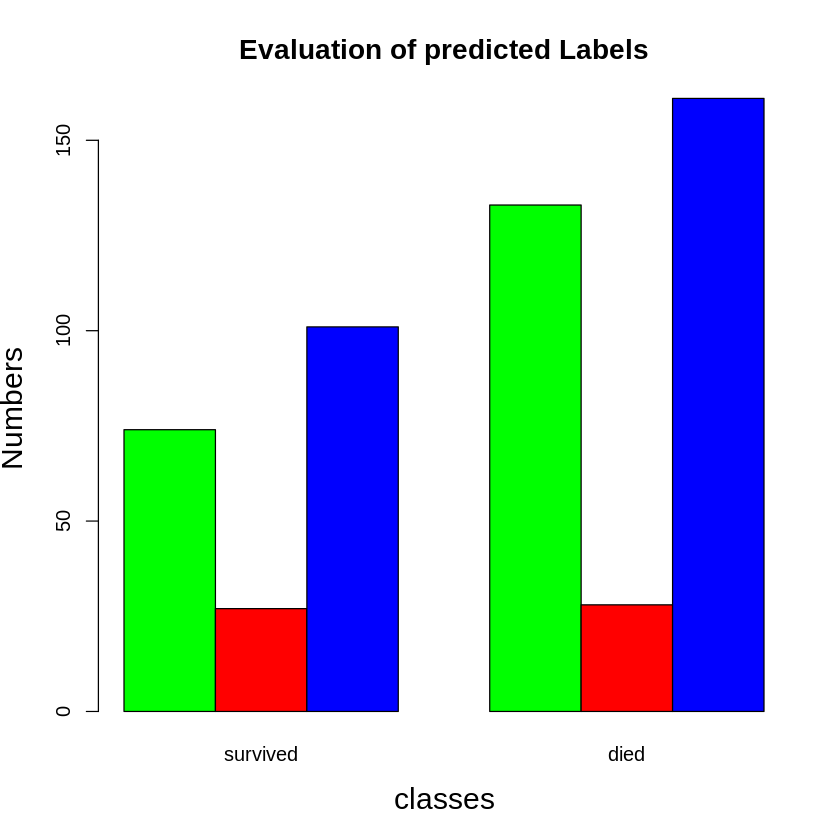

In [221]:
colours <- c("green","red", "blue")
rownames<-c('correct','incorrect','total')
colnames<-c('survived','died')
evaluationMatrix<-matrix(data<-c(correctSurvived,correctDied,wrongSurvived,wrongDied,correctSurvived+wrongSurvived,correctDied+wrongDied),ncol=2,nrow=3,byrow=TRUE,dimnames=list(rownames,colnames))
print(evaluationMatrix)
barplot(evaluationMatrix, main="Evaluation of predicted Labels", ylab = "Numbers",xlab="classes", cex.lab = 1.5, cex.main = 1.4, beside=TRUE,col=colours)